In [1]:
# https://diagrams.mingrammer.com/

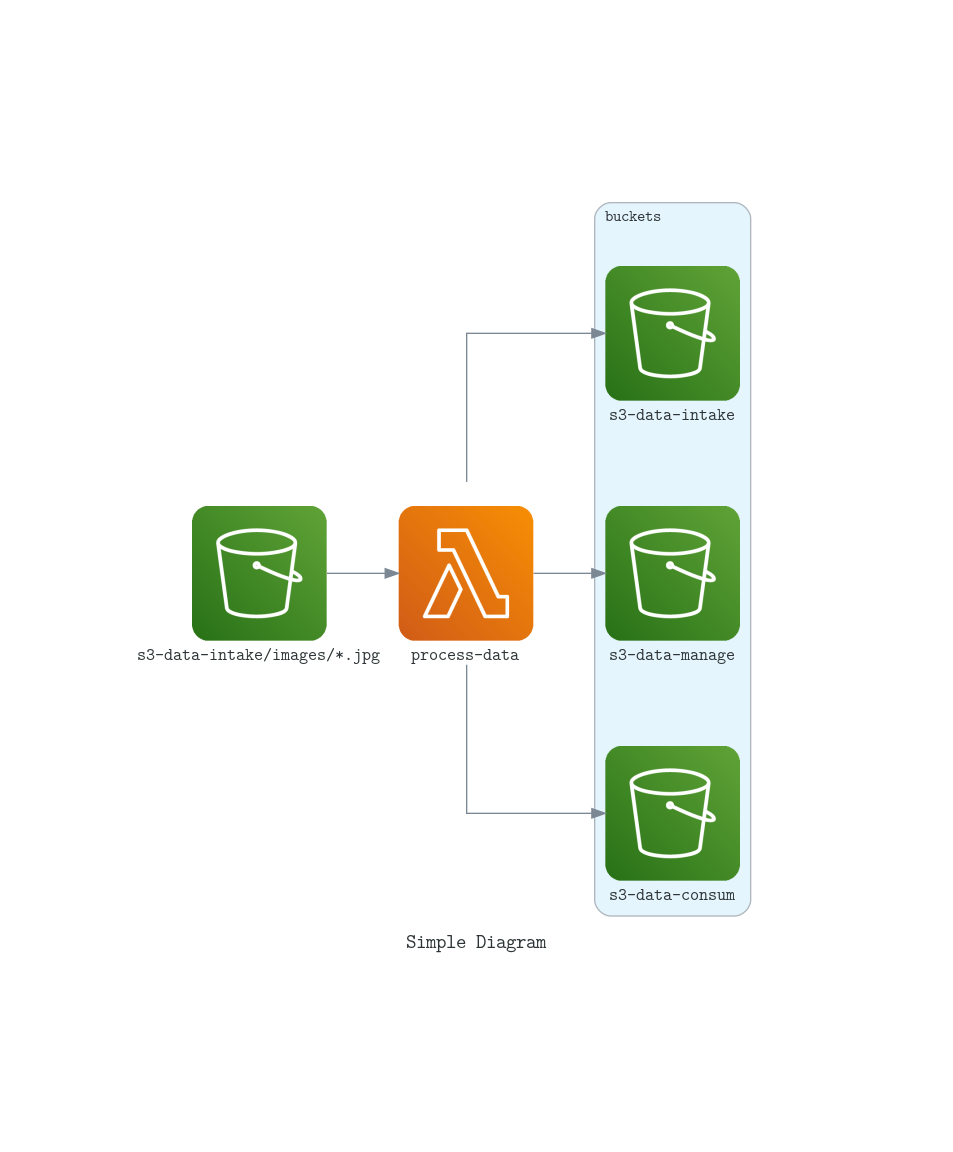

In [3]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import Lambda
from diagrams.aws.storage import S3
from diagrams.aws.integration import Eventbridge

import graphviz
from IPython.display import display

with Diagram("Simple Diagram", show=False) as simple_etl:
    intake=S3("s3-data-intake/images/*.jpg")
    with Cluster("buckets"):
            buckets = [S3("s3-data-intake"),
                       S3("s3-data-manage"),
                       S3("s3-data-consum")]

    lambda_process_data=Lambda("process-data")
    intake >> lambda_process_data >> buckets

simple_etl


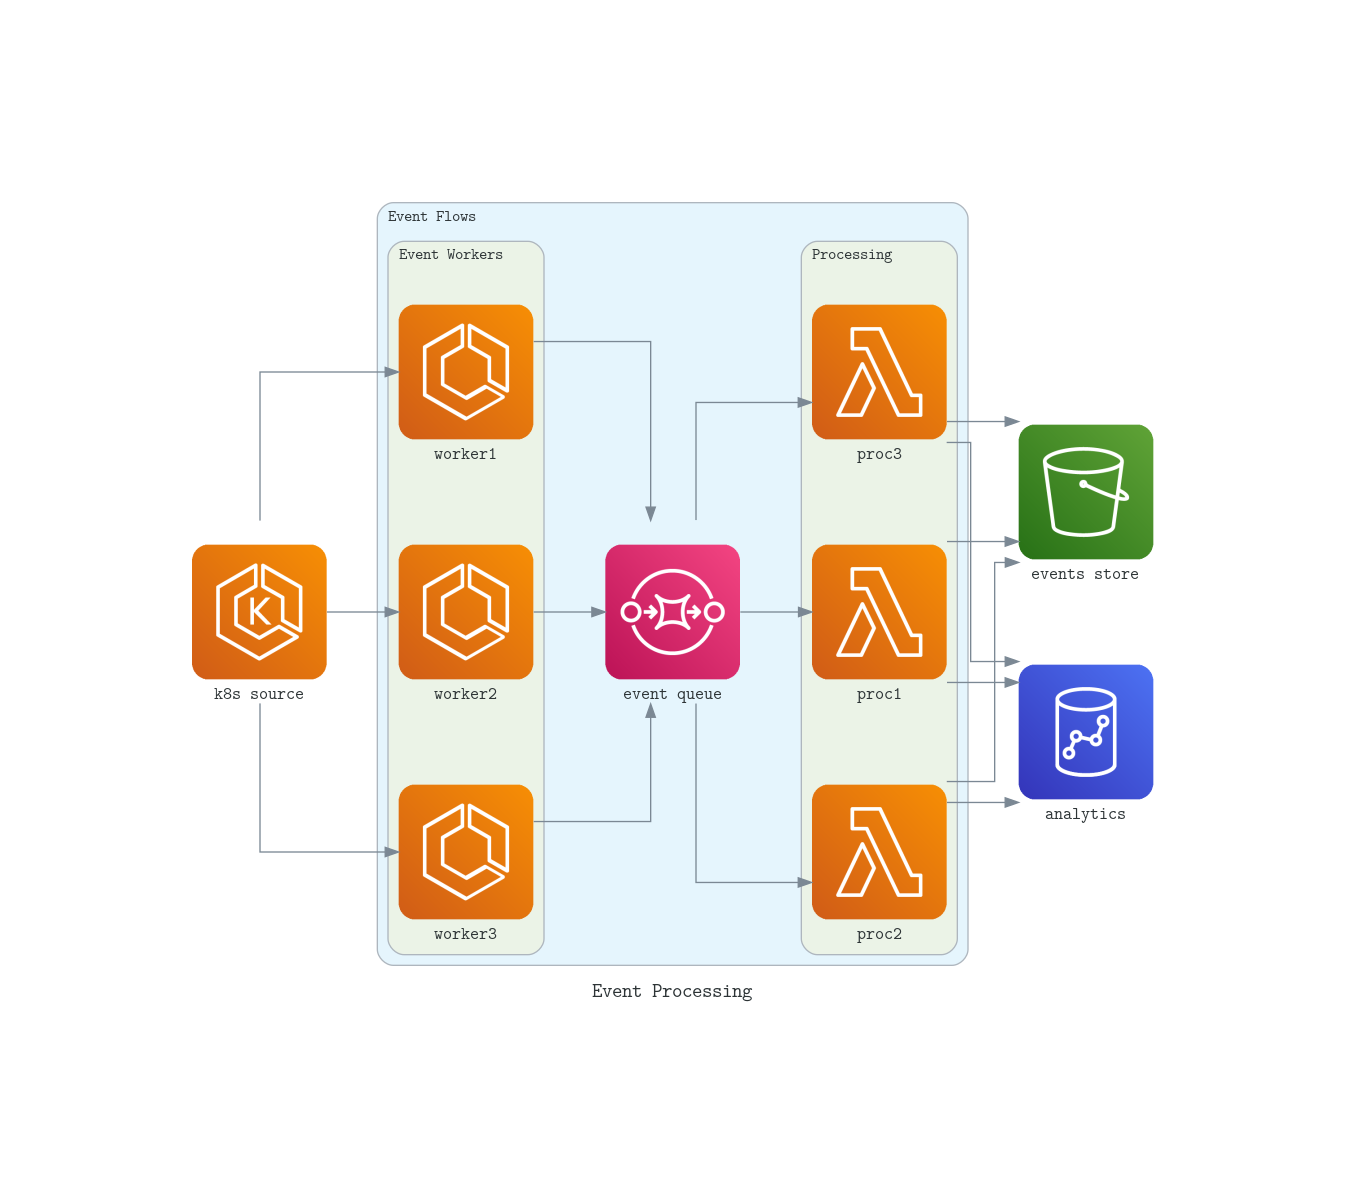

In [4]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS, EKS, Lambda
from diagrams.aws.database import Redshift
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3

with Diagram("Event Processing", show=False) as Event_Processing_on_AWS:
    source = EKS("k8s source")

    with Cluster("Event Flows"):
        with Cluster("Event Workers"):
            workers = [ECS("worker1"),
                       ECS("worker2"),
                       ECS("worker3")]

        queue = SQS("event queue")

        with Cluster("Processing"):
            handlers = [Lambda("proc1"),
                        Lambda("proc2"),
                        Lambda("proc3")]

    store = S3("events store")
    dw = Redshift("analytics")

    source >> workers >> queue >> handlers
    handlers >> store
    handlers >> dw
    
Event_Processing_on_AWS

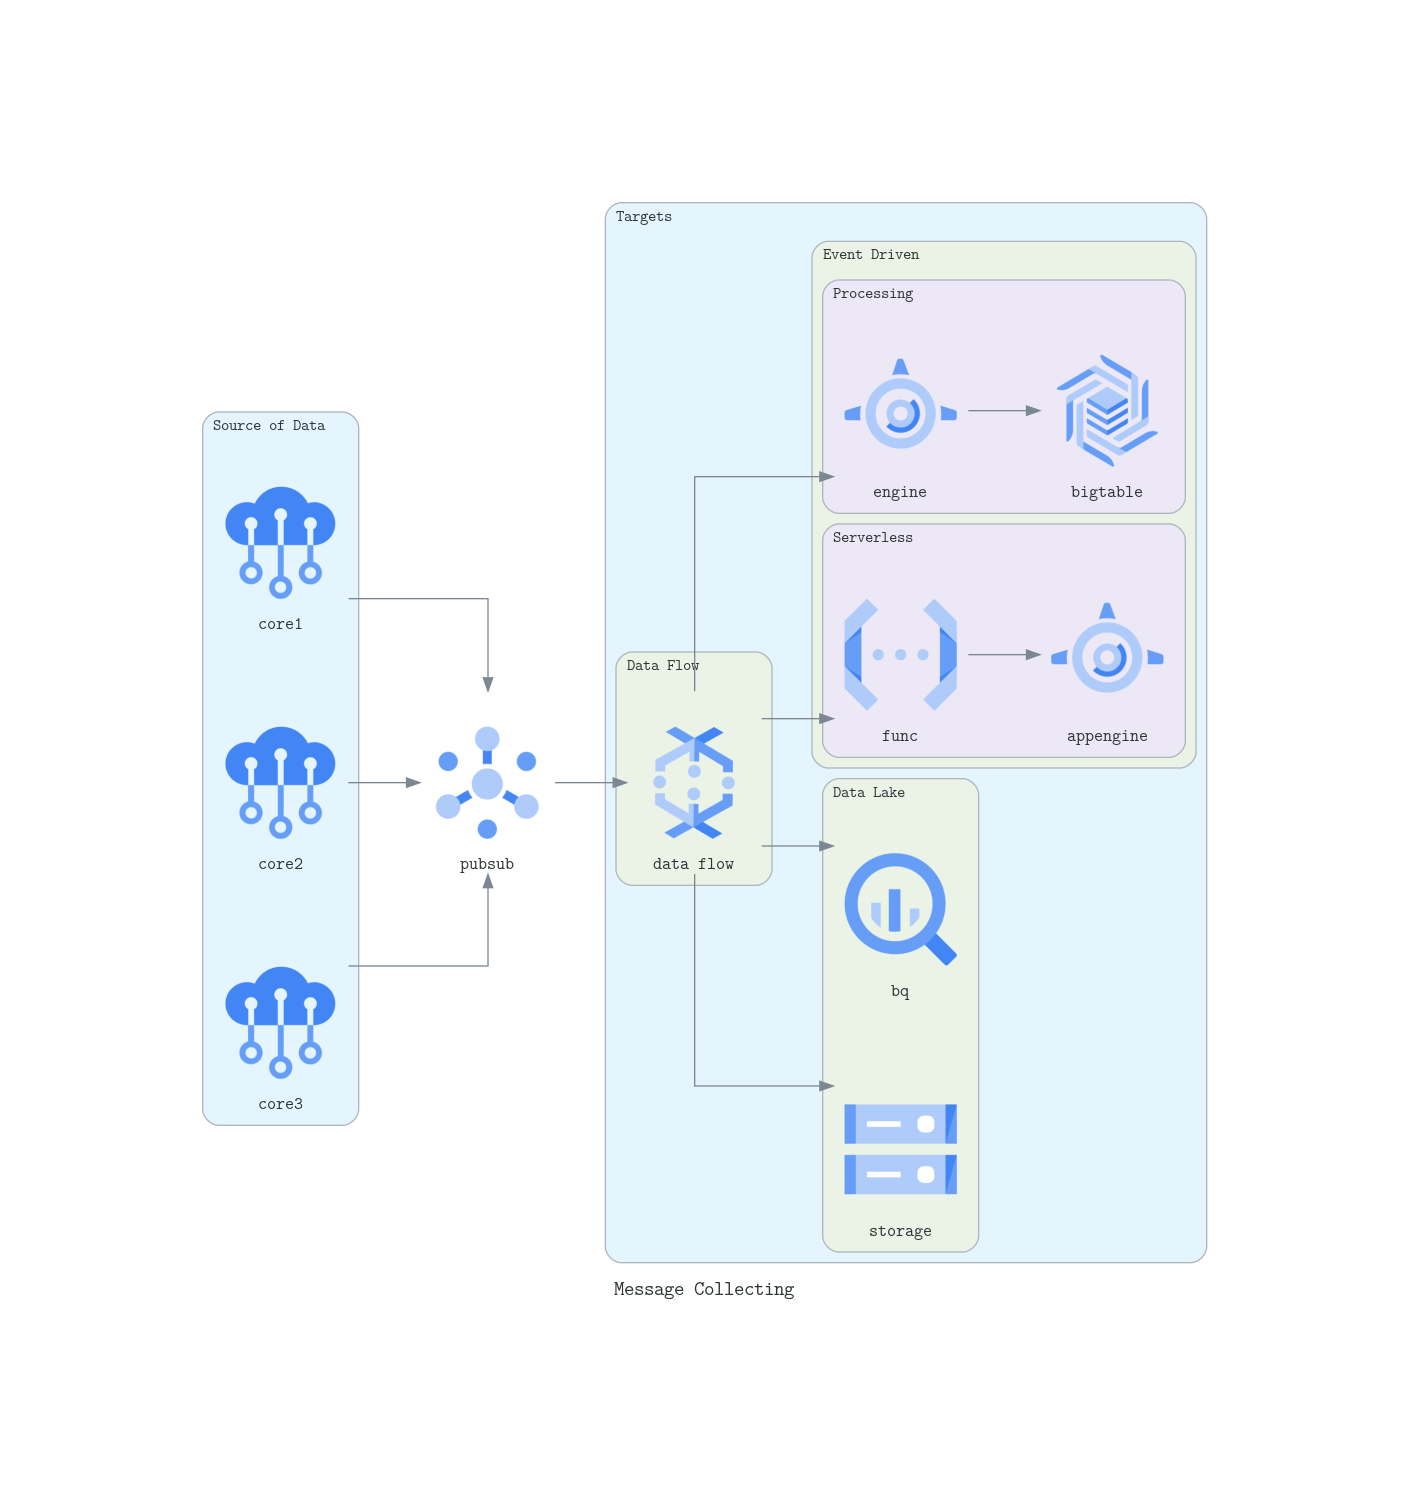

In [5]:
from diagrams import Cluster, Diagram
from diagrams.gcp.analytics import BigQuery, Dataflow, PubSub
from diagrams.gcp.compute import AppEngine, Functions
from diagrams.gcp.database import BigTable
from diagrams.gcp.iot import IotCore
from diagrams.gcp.storage import GCS

with Diagram("Message Collecting", show=False) as Message_Collecting_System_on_GCP:
    pubsub = PubSub("pubsub")

    with Cluster("Source of Data"):
        [IotCore("core1"),
         IotCore("core2"),
         IotCore("core3")] >> pubsub

    with Cluster("Targets"):
        with Cluster("Data Flow"):
            flow = Dataflow("data flow")

        with Cluster("Data Lake"):
            flow >> [BigQuery("bq"),
                     GCS("storage")]

        with Cluster("Event Driven"):
            with Cluster("Processing"):
                flow >> AppEngine("engine") >> BigTable("bigtable")

            with Cluster("Serverless"):
                flow >> Functions("func") >> AppEngine("appengine")

    pubsub >> flow
Message_Collecting_System_on_GCP

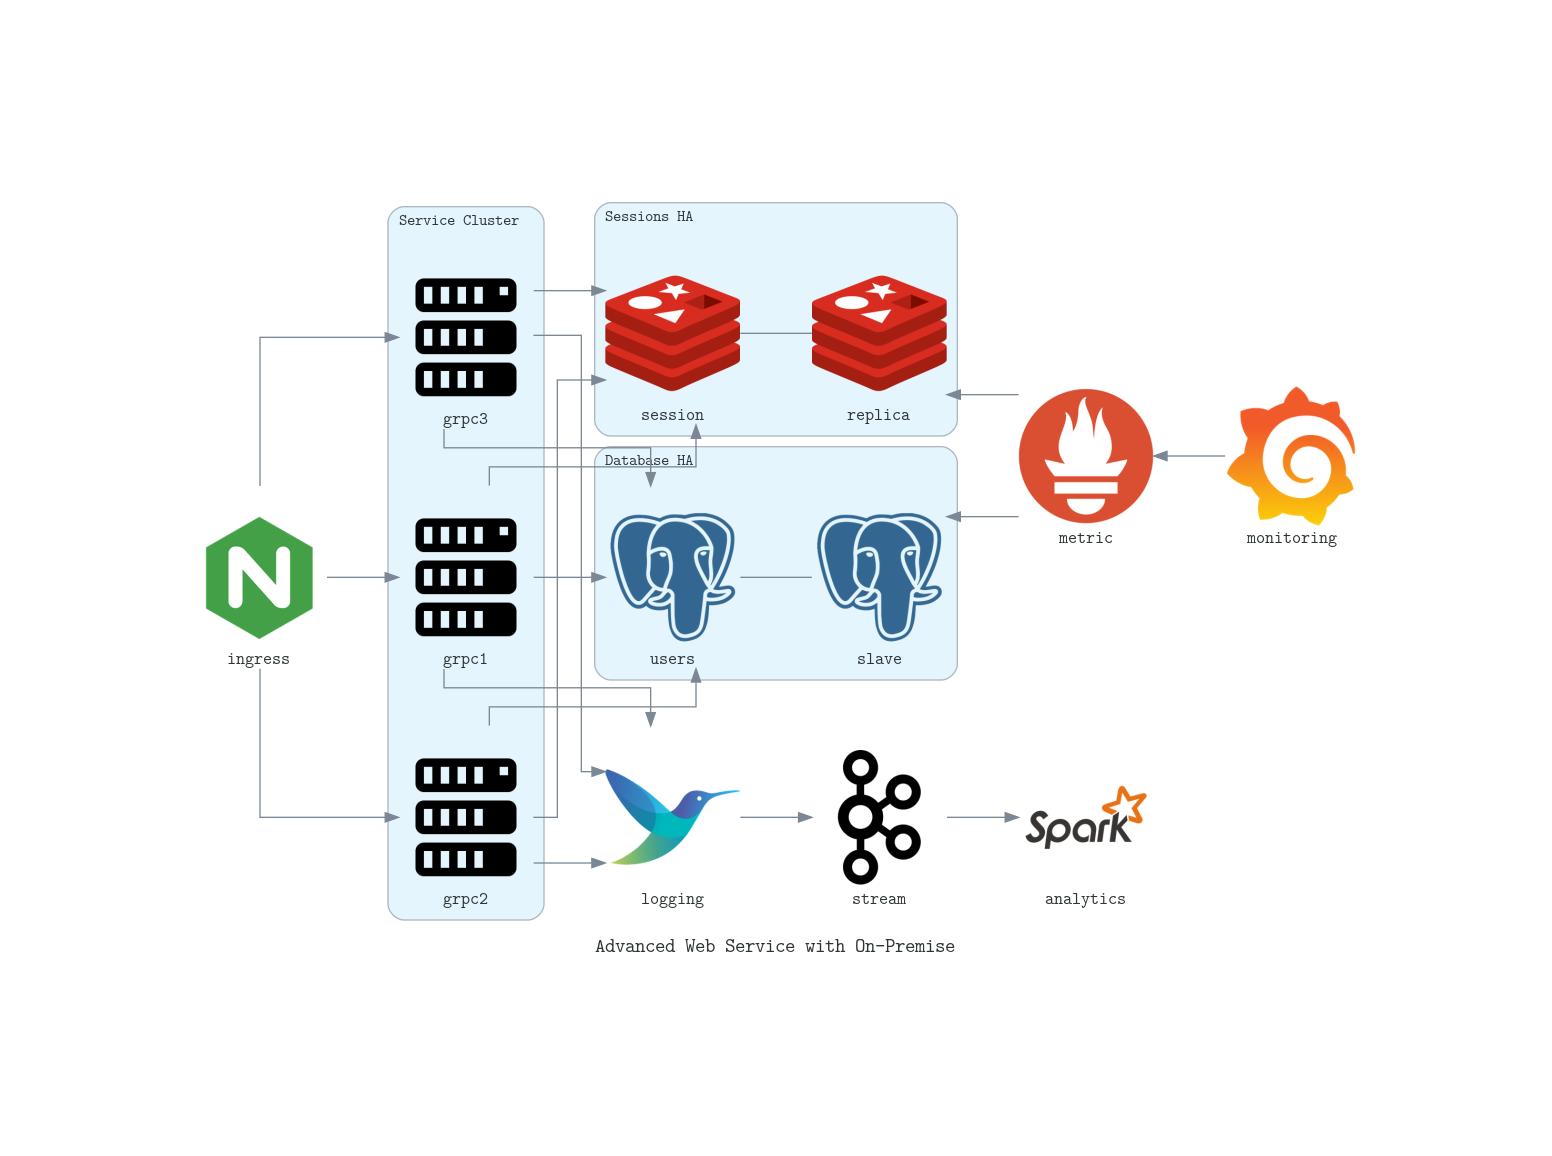

In [6]:
from diagrams import Cluster, Diagram
from diagrams.onprem.analytics import Spark
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.logging import Fluentbit
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka

with Diagram("Advanced Web Service with On-Premise", show=False) as Advanced_Web_Service_with_On_Premise:
    ingress = Nginx("ingress")

    metrics = Prometheus("metric")
    metrics << Grafana("monitoring")

    with Cluster("Service Cluster"):
        grpcsvc = [
            Server("grpc1"),
            Server("grpc2"),
            Server("grpc3")]

    with Cluster("Sessions HA"):
        master = Redis("session")
        master - Redis("replica") << metrics
        grpcsvc >> master

    with Cluster("Database HA"):
        master = PostgreSQL("users")
        master - PostgreSQL("slave") << metrics
        grpcsvc >> master

    aggregator = Fluentbit("logging")
    aggregator >> Kafka("stream") >> Spark("analytics")

    ingress >> grpcsvc >> aggregator
Advanced_Web_Service_with_On_Premise